In [3]:
# Standard data science imports
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# Statistics packages
import pylab
from pylab import rcParams
import statsmodels.api as sm
import statistics
from scipy import stats
# Scikit-learn
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import statsmodels.api as sm
# Ignore Warning Code
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Load the data
df = pd.read_csv('C:\\Users\\josue\\Desktop\\WGU\\D209\Resources\churn_cleanedtest.csv')
#load variables into our initial model variable
initial_model=['Gender', 'Marital', 'Children', 'Phone', 'Multiple', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn','Age','Tenure','MonthlyCharge']
df_model = df[initial_model]
df_model.head()

,Gender,Marital,Children,Phone,Multiple,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,Age,Tenure,MonthlyCharge
0,Male,Widowed,1,Yes,No,Fiber Optic,Yes,Yes,No,No,No,Yes,One year,Yes,Credit Card (automatic),No,68,6.795513,171.449762
1,Female,Married,1,Yes,Yes,Fiber Optic,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Bank Transfer(automatic),Yes,27,1.156681,242.948015
2,Female,Widowed,4,Yes,Yes,DSL,No,No,No,No,No,Yes,Two Year,Yes,Credit Card (automatic),No,50,15.754144,159.440398
3,Male,Married,1,Yes,No,DSL,Yes,No,No,No,Yes,No,Two Year,Yes,Mailed Check,No,48,17.087227,120.249493
4,Male,Separated,0,No,No,Fiber Optic,No,No,No,Yes,Yes,No,Month-to-month,No,Mailed Check,Yes,83,1.670972,150.761216


In [5]:
# Calculate total null values and total duplicate values in the data set
total_nulls = df_model.isna().sum().sum()
total_dupes = df_model.duplicated().sum()

print(f"Total Nulls: {total_nulls}\nTotal Duplicate Records: {total_dupes}")

Total Nulls: 0
Total Duplicate Records: 0


In [6]:
m, n = df_model.shape
print(f"Our data has {m} total customers (rows) and {n} total attributes (columns), including our response variable")

Our data has 10000 total customers (rows) and 19 total attributes (columns), including our response variable


In [7]:
print("Summary statistics:")
print(df_model.describe(include='all'))

Summary statistics:
        Gender   Marital      Children  Phone Multiple InternetService  \
count    10000     10000  10000.000000  10000    10000           10000   
unique       3         5           NaN      2        2               3   
top     Female  Divorced           NaN    Yes       No     Fiber Optic   
freq      5025      2092           NaN   9154     5392            4408   
mean       NaN       NaN      1.822500    NaN      NaN             NaN   
std        NaN       NaN      1.925971    NaN      NaN             NaN   
min        NaN       NaN      0.000000    NaN      NaN             NaN   
25%        NaN       NaN      1.000000    NaN      NaN             NaN   
50%        NaN       NaN      1.000000    NaN      NaN             NaN   
75%        NaN       NaN      3.000000    NaN      NaN             NaN   
max        NaN       NaN     10.000000    NaN      NaN             NaN   

       OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV  \
count       

In [8]:
#print out the value counts for the variables 
for var in initial_model:
    print(df_model[var].value_counts())
    print("\n")

Gender
Female                  5025
Male                    4744
Prefer not to answer     231
Name: count, dtype: int64


Marital
Divorced         2092
Widowed          2027
Separated        2014
Never Married    1956
Married          1911
Name: count, dtype: int64


Children
1     4369
0     1919
2     1100
3     1096
4      769
5      161
8      158
7      149
6      135
10      74
9       70
Name: count, dtype: int64


Phone
Yes    9154
No      846
Name: count, dtype: int64


Multiple
No     5392
Yes    4608
Name: count, dtype: int64


InternetService
Fiber Optic    4408
DSL            3463
No service     2129
Name: count, dtype: int64


OnlineSecurity
No     6424
Yes    3576
Name: count, dtype: int64


OnlineBackup
No     5494
Yes    4506
Name: count, dtype: int64


DeviceProtection
No     5614
Yes    4386
Name: count, dtype: int64


TechSupport
No     6626
Yes    3374
Name: count, dtype: int64


StreamingTV
No     5071
Yes    4929
Name: count, dtype: int64


StreamingMovies
No    

In [9]:
# Define categorical columns for one-hot encoding
categorical_columns = ['Gender', 'Marital', 'InternetService']
# List of binary (two-category) categorical columns for label encoding
binary_columns = [
     'Children', 'Phone', 
    'Multiple', 'OnlineSecurity', 'OnlineBackup', 
    'DeviceProtection', 'TechSupport', 'StreamingTV', 
    'StreamingMovies', 'PaperlessBilling', 'Churn'
]

# List of nominal (more than two-category) categorical columns for one-hot encoding
nominal_columns = [
    'Contract', 'PaymentMethod'
]

# Before Encoding
print("Before Encoding:\n")
print(df_model[binary_columns + nominal_columns].head())

Before Encoding:

   Children Phone Multiple OnlineSecurity OnlineBackup DeviceProtection  \
0         1   Yes       No            Yes          Yes               No   
1         1   Yes      Yes            Yes           No               No   
2         4   Yes      Yes             No           No               No   
3         1   Yes       No            Yes           No               No   
4         0    No       No             No           No               No   

  TechSupport StreamingTV StreamingMovies PaperlessBilling Churn  \
0          No          No             Yes              Yes    No   
1          No         Yes             Yes              Yes   Yes   
2          No          No             Yes              Yes    No   
3          No         Yes              No              Yes    No   
4         Yes         Yes              No               No   Yes   

         Contract             PaymentMethod  
0        One year   Credit Card (automatic)  
1  Month-to-month  Bank Transf

In [10]:
# Apply label encoding to binary categorical variables
label_encoder = LabelEncoder()
for column in binary_columns:
    df_model[column] = label_encoder.fit_transform(df_model[column])

# Apply one-hot encoding to these specific columns
df_model = pd.get_dummies(df_model, columns=categorical_columns, drop_first=False)

# Apply one-hot encoding to the remaining nominal columns with drop_first=True if they have more than two categories
df_model = pd.get_dummies(df_model, columns=nominal_columns, drop_first=False)

# After Encoding
print("\nAfter Encoding:\n")
print(df_model.head())


After Encoding:

   Children  Phone  Multiple  OnlineSecurity  OnlineBackup  DeviceProtection  \
0         1      1         0               1             1                 0   
1         1      1         1               1             0                 0   
2         4      1         1               0             0                 0   
3         1      1         0               1             0                 0   
4         0      0         0               0             0                 0   

   TechSupport  StreamingTV  StreamingMovies  PaperlessBilling  ...  \
0            0            0                1                 1  ...   
1            0            1                1                 1  ...   
2            0            0                1                 1  ...   
3            0            1                0                 1  ...   
4            1            1                0                 0  ...   

   InternetService_DSL  InternetService_Fiber Optic  \
0                Fa

In [11]:
# Ensure that all dummy variables are in numeric format (0 and 1)
df_model = df_model.applymap(lambda x: 1 if x is True else (0 if x is False else x))

# After Encoding
print("\nAfter Converting Booleans to Numeric:\n")
print(df_model.head())
df_model.to_csv('df_modelencodedcheck.csv', index=False)


After Converting Booleans to Numeric:

   Children  Phone  Multiple  OnlineSecurity  OnlineBackup  DeviceProtection  \
0         1      1         0               1             1                 0   
1         1      1         1               1             0                 0   
2         4      1         1               0             0                 0   
3         1      1         0               1             0                 0   
4         0      0         0               0             0                 0   

   TechSupport  StreamingTV  StreamingMovies  PaperlessBilling  ...  \
0            0            0                1                 1  ...   
1            0            1                1                 1  ...   
2            0            0                1                 1  ...   
3            0            1                0                 1  ...   
4            1            1                0                 0  ...   

   InternetService_DSL  InternetService_Fiber Optic 

<Axes: xlabel='Churn'>

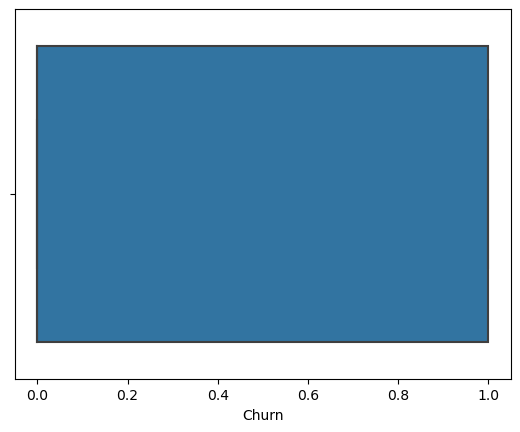

In [12]:
sns.boxplot(x=df_model["Churn"])

In [15]:
# Split Data into Features and Target Variable

X = df_model.drop(columns=['Churn'])

y = df_model['Churn']

# Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Show the first few rows of the training and testing sets
print("\nTraining Set Features:\n")
print(X_train.head())

# Save out the training and testing datasets

train_df = pd.concat([X_train, y_train], axis=1)

test_df = pd.concat([X_test, y_test], axis=1)




Training Set Features:

      Children  Phone  Multiple  OnlineSecurity  OnlineBackup  \
9254         1      1         0               0             1   
1561         3      1         1               1             1   
1670         3      0         1               1             1   
6087         2      1         0               0             1   
6669         1      1         1               1             1   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  \
9254                 0            0            0                1   
1561                 1            0            1                1   
1670                 1            0            1                0   
6087                 0            1            1                0   
6669                 0            0            0                1   

      PaperlessBilling  ...  InternetService_DSL  InternetService_Fiber Optic  \
9254                 1  ...                    1                            0   
1561   

In [17]:
#print out training set targets
print("\nTraining Set Target:\n")
print(y_train)


Training Set Target:

9254    0
1561    1
1670    0
6087    0
6669    0
       ..
5734    0
5191    0
5390    0
860     0
7270    0
Name: Churn, Length: 8000, dtype: int64


In [18]:
#print out set features
print("\nTest Set Features:\n")
print(X_test.head())



Test Set Features:

      Children  Phone  Multiple  OnlineSecurity  OnlineBackup  \
6252         3      1         0               0             0   
4684         7      0         1               1             0   
1731         1      1         1               1             1   
4742         1      1         0               1             0   
4521         1      1         1               0             0   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  \
6252                 0            0            1                0   
4684                 1            1            1                1   
1731                 0            0            1                1   
4742                 1            1            0                0   
4521                 0            0            0                1   

      PaperlessBilling  ...  InternetService_DSL  InternetService_Fiber Optic  \
6252                 1  ...                    0                            1   
4684       

In [19]:
#print out the target results
print("\nTest Set Target:\n")
print(y_test.head())


Test Set Target:

6252    0
4684    1
1731    1
4742    0
4521    0
Name: Churn, dtype: int64


In [20]:
# Save out the training and testing datasets
train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

train_df.to_csv('churn_train.csv', index=False)
test_df.to_csv('churn_test.csv', index=False)

In [21]:
# Initialize the Naive Bayes model
nb_model = GaussianNB()

# Train the model
nb_model.fit(X_train, y_train)

# Predict the test set results
y_pred = nb_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate AUC
y_pred_proba = nb_model.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_test, y_pred_proba)

# Print accuracy and AUC
print(f"Accuracy of the Naive Bayes model: {accuracy:.2f}")
print(f"AUC of the Naive Bayes model: {auc:.2f}")


Accuracy of the Naive Bayes model: 0.85
AUC of the Naive Bayes model: 0.92


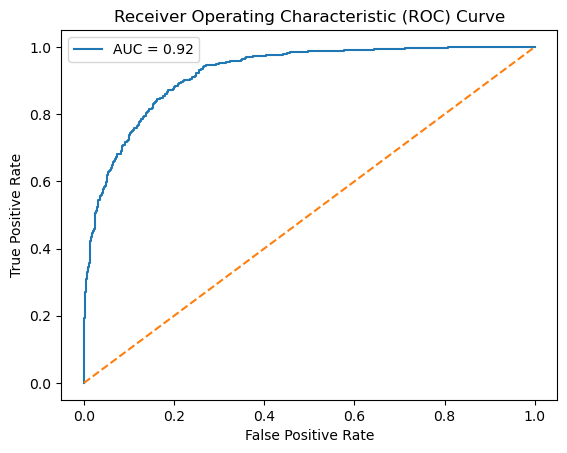

In [17]:
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()